In [1]:
# -*- coding: utf-8 -*-
"""
folium 라이브러리를 활용한 지도 시각화
(위경도 좌표는 네이버 API 활용)
"""

'''
(1) 주소 => 좌표 (네이버 API)
  https://developers.naver.com/docs/common/apilist/
'''
import re
import json
import requests
import pandas as pd
import numpy as np
import os
import folium

# 네이버 API 인증 정보
import mykey
session = requests.Session()
session.headers['X-Naver-Client-Id'] = mykey.nid  
session.headers['X-Naver-Client-Secret'] = mykey.ipw

In [2]:
# 좌표 얻는 함수
def geocode(query_str, url=None):
    if not url:
        url = 'https://openapi.naver.com/v1/map/geocode'
    param = { 'query': query_str }
    resp = session.get(url, params=param)
    
    try:
        result = json.loads(resp.text)['result']
        total = result['total']
        items = result['items']
        if total > 1:
            print('Warn: 여러개의 검색 결과가 있습니다.')
            print(items)
            return items[0]['point']
        else:
            return items[0]['point']
    except:
        return '응답결과 없음'
    
#geocode("서울시 영등포구 도신로4길")
#geocode("서울시 영등포구 국제금융로 56")
    
'''	
def reverse_geocode(lat, lng, url='https://openapi.naver.com/v1/map/reversegeocode'):
    q = ','.join([str(lat), str(lng)])
    return geocode(q)
'''

"\t\ndef reverse_geocode(lat, lng, url='https://openapi.naver.com/v1/map/reversegeocode'):\n    q = ','.join([str(lat), str(lng)])\n    return geocode(q)\n"

In [3]:
os.getcwd()

'C:\\Users\\user'

In [71]:
# 데이터읽기 수익률 70%이상 고객
import os

trainFile = 'C:\\Users\\user\BEST(70%).csv'

pwd = os.getcwd()
os.chdir(os.path.dirname(trainFile))
best = pd.read_csv(os.path.basename(trainFile))
os.chdir(pwd)

In [72]:
best.head()

,CUST_NO,시간평잔수익률,POST_NO,POST_NO_ADDR
0,5000003369140,84.353741,63157,제주 제주시 용담로2길
1,5000002848040,83.197107,51669,경남 창원시 진해구 진해대로
2,1520583,84.146238,10407,경기 고양시 일산동구 일산로316번길
3,5000002625718,94.385593,51281,경남 창원시 마산합포구 교방남4길
4,5000001005296,82.800147,54502,전북 익산시 함라면 어등1길


In [73]:
best.columns = ['CUST_NO','RE','POST_NO','POST_NO_ADDR']
best.head()

,CUST_NO,RE,POST_NO,POST_NO_ADDR
0,5000003369140,84.353741,63157,제주 제주시 용담로2길
1,5000002848040,83.197107,51669,경남 창원시 진해구 진해대로
2,1520583,84.146238,10407,경기 고양시 일산동구 일산로316번길
3,5000002625718,94.385593,51281,경남 창원시 마산합포구 교방남4길
4,5000001005296,82.800147,54502,전북 익산시 함라면 어등1길


In [74]:
# addrs = ["서울시 영등포구 도신로4길", "서울시 영등포구 국제금융로 56"]
# addrs = ["서울시 서대문구 연희동 성원아파트 102동 406호", "서울시 영등포구 신길동 삼환아파트 104동 1202호"]
# addrs = ["경기도 용인시 수지구 동천동 풍림2차아파트 201동 609호", "서울시 영등포구 신길동"]
addrs = best['POST_NO_ADDR']

x_lst, y_lst = [], []
for addr in addrs:
    try:
        x_lst.append(geocode(addr)['x'])
        y_lst.append(geocode(addr)['y'])   # ==> X, Y 좌표 바뀜
    except: 
        pass        

In [75]:
map_osm = folium.Map(location=[37.566696, 126.977942], zoom_start=12)  # 지도 중앙(시청)
for i in range(len(x_lst)):
    folium.Marker([y_lst[i], x_lst[i]],                   
                  icon = folium.Icon(color ='red')).add_to(map_osm)
map_osm.save('best70.html')

In [76]:
len(x_lst)

578

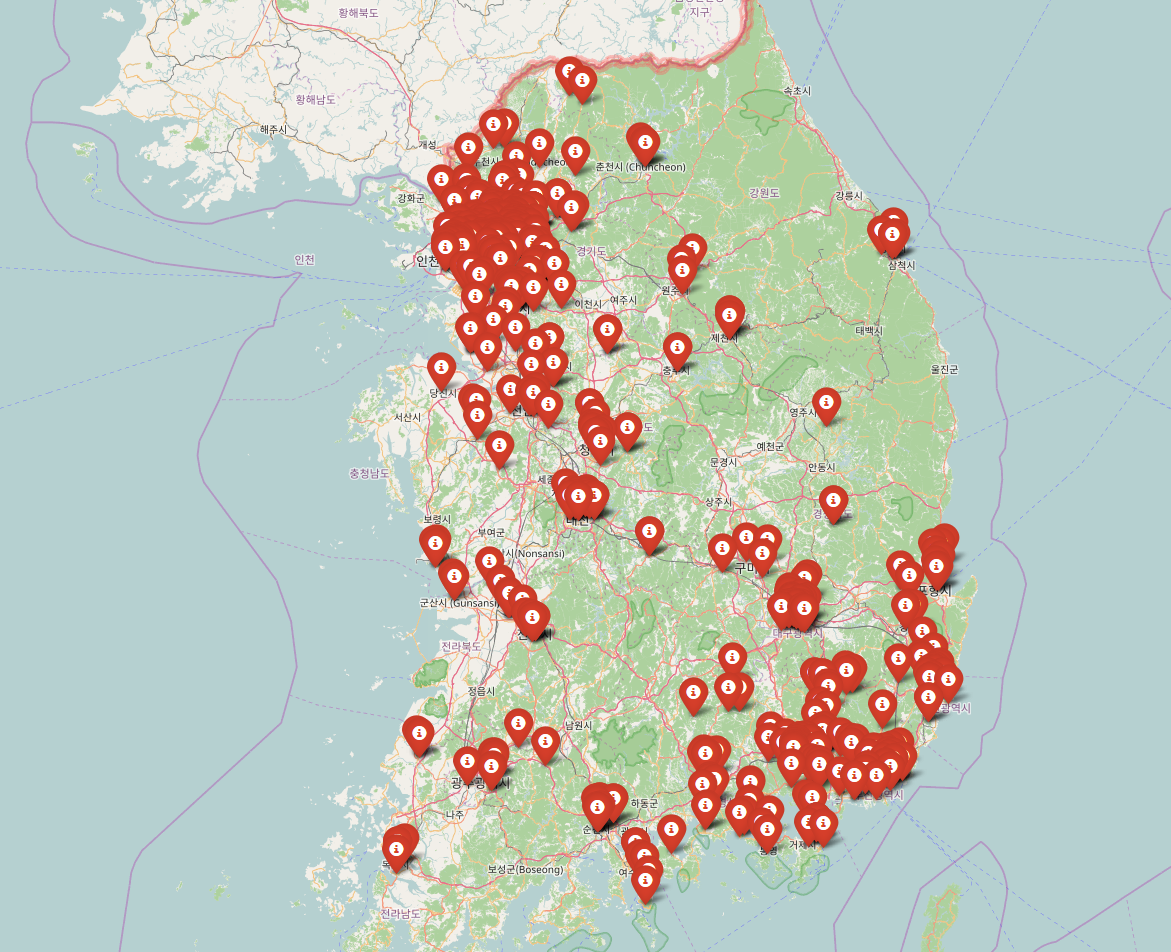

In [39]:
# 수익률 70%
from IPython.display import Image
Image("best70.png",  width=500)

In [40]:
# 데이터읽기 수익률 70%이상 고객
import os

trainFile = 'C:\\Users\\user\BEST(70%).csv'

pwd = os.getcwd()
os.chdir(os.path.dirname(trainFile))
best = pd.read_csv(os.path.basename(trainFile))
os.chdir(pwd)

In [41]:
best.columns = ['CUST_NO','RE','POST_NO','POST_NO_ADDR']
best.head()

,CUST_NO,RE,POST_NO,POST_NO_ADDR
0,5000003369140,84.353741,63157,제주 제주시 용담로2길
1,5000002848040,83.197107,51669,경남 창원시 진해구 진해대로
2,1520583,84.146238,10407,경기 고양시 일산동구 일산로316번길
3,5000002625718,94.385593,51281,경남 창원시 마산합포구 교방남4길
4,5000001005296,82.800147,54502,전북 익산시 함라면 어등1길


In [52]:
best1 = best.sort_values(by= 'RE', ascending=False)
best1.head()

,CUST_NO,RE,POST_NO,POST_NO_ADDR
255,5000001950499,105.842189,53022,경남 통영시 광도면 용호1길
192,5000002274307,105.681818,34677,대전 동구 옥천로
226,5000000228714,105.279440,46765,부산 강서구 명지오션시티3로
567,1000000547551,105.158981,12169,경기 남양주시 화도읍 먹갓로서길
203,1000000547551,105.158981,12169,경기 남양주시 화도읍 먹갓로서길


In [60]:
best1.duplicated()

255    False
192    False
226    False
567    False
203     True
46     False
40     False
78     False
423    False
15     False
506    False
574    False
545    False
287    False
520    False
476    False
138    False
553    False
404    False
403    False
175    False
427    False
300    False
406    False
349    False
346    False
443    False
348    False
347    False
290    False
       ...  
248    False
158    False
433    False
485    False
271    False
513    False
329    False
153    False
432    False
342    False
484    False
395    False
494    False
105    False
263    False
337    False
220    False
362    False
373    False
546    False
29     False
456    False
522    False
48     False
328    False
134    False
143    False
33     False
50     False
301    False
dtype: bool

In [58]:
best2= best1.duplicated()
best2.head()

,CUST_NO,RE,POST_NO,POST_NO_ADDR
255,5000001950499,105.842189,53022,경남 통영시 광도면 용호1길
192,5000002274307,105.681818,34677,대전 동구 옥천로
226,5000000228714,105.279440,46765,부산 강서구 명지오션시티3로
567,1000000547551,105.158981,12169,경기 남양주시 화도읍 먹갓로서길
46,1000000453356,104.551247,10476,경기 고양시 덕양구 은빛로29번길


In [77]:
len(best2)

580

In [78]:
len(best1)

580

In [88]:
#best2.ix[:,2]>= 100]
#AA = [best2['RE'] > 100]
print(type(best2))
#print(best2['RE'] )

<class 'pandas.core.series.Series'>


In [5]:
# 데이터읽기 자산 20억이상 고객
import os

trainFile = 'C:\\Users\\user\RT3.csv'

pwd = os.getcwd()
os.chdir(os.path.dirname(trainFile))
rich = pd.read_csv(os.path.basename(trainFile))
os.chdir(pwd)

In [7]:
rich.columns = ['CUST_NO','평잔','POST_NO','POST_NO_ADDR']
rich.head()

,CUST_NO,평잔,POST_NO,POST_NO_ADDR
0,2523544,7.500000e+11,5345,서울 강동구 명일로18길
1,927880,2.642171e+11,13622,경기 성남시 분당구 구미로144번길
2,278426,5.494576e+10,4606,서울 중구 장충단로6가길
3,1310082,4.945436e+10,21942,인천 연수구 청량로
4,1000000582607,4.446798e+10,21939,인천 연수구 한나루로180번길


In [8]:
# addrs = ["서울시 영등포구 도신로4길", "서울시 영등포구 국제금융로 56"]
# addrs = ["서울시 서대문구 연희동 성원아파트 102동 406호", "서울시 영등포구 신길동 삼환아파트 104동 1202호"]
# addrs = ["경기도 용인시 수지구 동천동 풍림2차아파트 201동 609호", "서울시 영등포구 신길동"]
addrs = rich['POST_NO_ADDR']

x_lst, y_lst = [], []
for addr in addrs:
    try:
        x_lst.append(geocode(addr)['x'])
        y_lst.append(geocode(addr)['y'])   # ==> X, Y 좌표 바뀜
    except: 
        pass        

In [9]:
map_osm = folium.Map(location=[37.566696, 126.977942], zoom_start=12)  # 지도 중앙(시청)
for i in range(len(x_lst)):
    folium.Marker([y_lst[i], x_lst[i]],                   
                  icon = folium.Icon(color ='red')).add_to(map_osm)
map_osm.save('rich20.html')

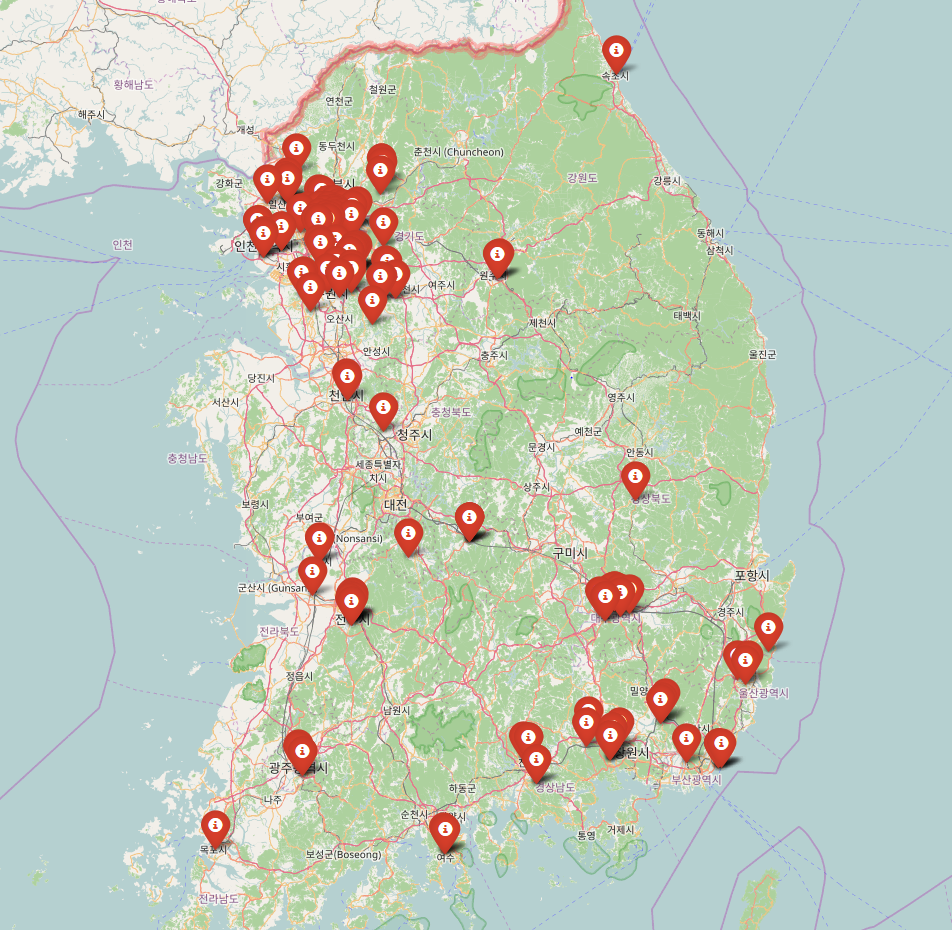

In [10]:
# 자산 20억
from IPython.display import Image
Image("rich20.png",  width=500)

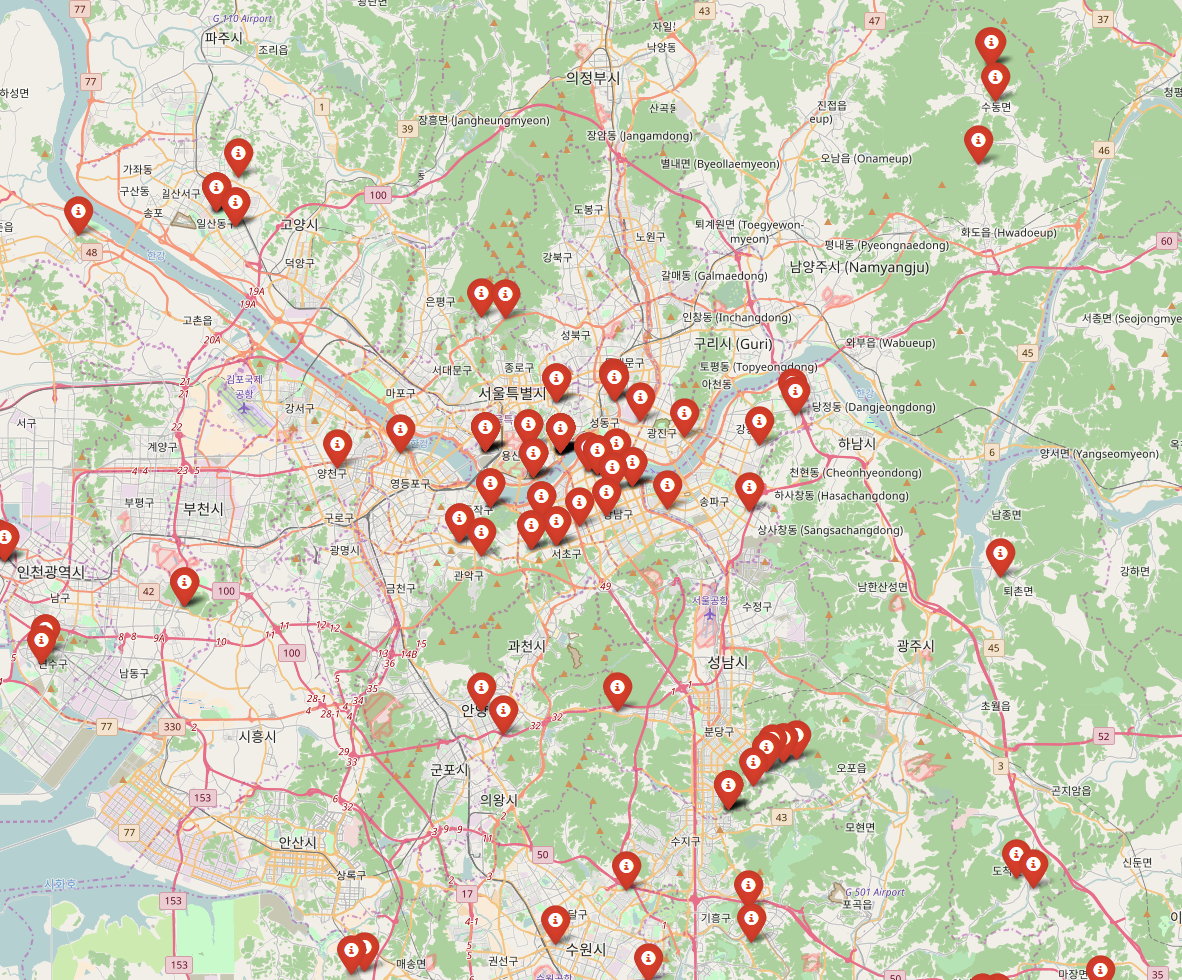

In [11]:
# 서울 20억
Image("서울20억.png",  width=500)